# Анализ A/B теста

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание" data-toc-modified-id="Описание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание</a></span></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ A/B теста</a></span><ul class="toc-item"><li><span><a href="#Чтение-и-предобработка-датафреймов" data-toc-modified-id="Чтение-и-предобработка-датафреймов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Чтение и предобработка датафреймов</a></span></li><li><span><a href="#Обработка-сырых-данных" data-toc-modified-id="Обработка-сырых-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обработка сырых данных</a></span></li><li><span><a href="#Обработка-очищенных-данных" data-toc-modified-id="Обработка-очищенных-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обработка очищенных данных</a></span></li></ul></li></ul></div>

## Описание

Мы — аналитики крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Наша задача - приоритизировать гипотезы, запустить A/B тест по наиболее перспективной и проанализировать его результаты.

У нас есть 3 датасета:

- 1 датасет с оценками гипотез для приоритизации.
- 2 датасета с результатами A/B теста.

## Приоритизация гипотез

Для начала, используя первый датасет, выполним приоритизацию гипотез.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth', 120)
hypothesis = pd.read_csv('hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


У нас есть 9 гипотез с оцененными параметрами Reach, Impact, Confidence, Efforts.

Для оценки гипотез будем использовать техники ICE и RICE. Начнем с ICE. Его формула: `Impact * Confidence / Efforts.`
Добавим в нашу табличку новый столбец с оценкой по ICE.

In [3]:
def ice_score(df, impact, confidence, efforts):
    df['ICE_score'] = round((df[impact] * df[confidence]) / df[efforts], 1)
    return df
    
hypothesis = ice_score(hypothesis, 'Impact', 'Confidence', 'Efforts')
hypothesis.sort_values(by='ICE_score', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


Самыми перспективными, при оценки по данной методике оказались 9, 1 и 8 гипотезы. Однако параметр охвата у 9 и 1 достаточно низкие, что негативно скажется на их рейтинге при оценке по RICE. Сделаем новый расчет и убедимся в этом. Формула RICE: `Reach * Impact * Confidence / Efforts.`

In [4]:
def rice_score(df, reach, impact, confidence, efforts):
    df['RICE_score'] = round((df[reach] * df[impact] * df[confidence]) / df[efforts], 1)
    return df

hypothesis = rice_score(hypothesis, 'Reach', 'Impact', 'Confidence', 'Efforts')
hypothesis.sort_values(by='RICE_score', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE_score,RICE_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


Как мы и ожидали, при оценки по RICE, наиболее перспективной оказалась 8 гипотеза (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок). Ее мы и возьмем для A/B тестирования.

### Вывод

Гипотезы были приоритизированы по 2 техникам: ICE и RICE. В результате, наиболее перспективной гипотезой оказалась гипотеза 8 - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

## Анализ A/B теста

### Чтение и предобработка датафреймов

Загрузим результаты нашего A/B тестирования. Мы подразумеваем, что перед ним был проведен A/A тест, проверена разбивка пользователей на группы, технических проблем с тестом не возникало.

In [5]:
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')
display(orders.head())
display(visitors.head())
orders.info()
visitors.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


С названиями столбцов все в порядке, но я предпочту заменить их на более привычные, также необходимо заменить типы данных в столбцах с данными.

Воспользуюсь собственными функциями из прошлых проектов.

In [6]:
def make_df_good(df, ts):
    df.columns = [x.lower().replace(' ', '_') for x in df.columns]            # Приводим названия к верному виду
    df[ts] = pd.to_datetime(df[ts])                                           # Изменяем тип даты
    if df.duplicated().sum() != 0:
        return 'Внимание: есть дубликаты'                                     # Проверка на дубликаты
    return(df)

visitors = make_df_good(visitors, 'date')
visitors = visitors.sort_values(by=['date', 'group']).reset_index(drop=True)
orders = make_df_good(orders, 'date')
orders.rename(columns={'transactionid':'transaction_id', 'visitorid':'visitor_id'}, inplace=True)

Проверим даты в наших датафреймах, узнаем время проведения эксперимента

In [7]:
print('Минимальная и максимальная даты в orders', orders['date'].min(), '----', orders['date'].max())
print('Минимальная и максимальная даты в visitors', visitors['date'].min(), '----', visitors['date'].max())

Минимальная и максимальная даты в orders 2019-08-01 00:00:00 ---- 2019-08-31 00:00:00
Минимальная и максимальная даты в visitors 2019-08-01 00:00:00 ---- 2019-08-31 00:00:00


Эксперимент проводился в августе 19 года, диапазон дат совпадает.

Проверим, есть ли в наших данных фликеры - пользователи, попадавшие и в ту и в другую группу.

In [8]:
duplicated_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'group':['nunique', 'unique']})
)

duplicated_users = duplicated_users.loc[duplicated_users['group']['nunique'] >= 2]
duplicated_users.columns = ['visitor_id', 'n_groups', 'groups']
duplicated_users.info()
duplicated_users.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 2 to 1026
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   visitor_id  58 non-null     int64 
 1   n_groups    58 non-null     int64 
 2   groups      58 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


,visitor_id,n_groups,groups
2,8300375,2,"[B, A]"
44,199603092,2,"[A, B]"
51,232979603,2,"[B, A]"
55,237748145,2,"[B, A]"
66,276558944,2,"[B, A]"


In [9]:
print('Процент фликеров в наших пользователях', (len(duplicated_users['visitor_id'].unique()) / len(orders['visitor_id'].unique())) * 100)

Процент фликеров в наших пользователях 5.625606207565471


Такие пользователи, к сожалению, обнаружились и их доля достаточна велика. Возможно эти 5.6% пользователей почистили куки или наша система распределения групп дала сбой. В идеале необходимо выяснить причину столь большого процента фликеров, и, возможно, перезапустить тест с исправленной проблемой. 

Удалим этих пользователей из датасета

In [10]:
orders = orders.query('visitor_id not in @duplicated_users["visitor_id"]')

Теперь мы готовы переходить к анализу

### Обработка сырых данных

Теперь наша задача - составить таблицу с кумулятивнымии параметрами по датам

In [11]:
display(orders.head())
display(visitors.head())

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,619
3,2019-08-02,B,581
4,2019-08-03,A,507


In [12]:
orders_agg = (
    visitors.apply(lambda string: orders[np.logical_and(orders['date'] <= string['date'], orders['group'] == string['group'])].agg({'date':'max', 'group':'max', 'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

visitors_agg = (
    visitors.apply(lambda string: visitors[np.logical_and(visitors['date'] <= string['date'], visitors['group'] == string['group'])].agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

cum_data = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])

cum_data.columns = ['date', 'group', 'n_orders', 'n_buyers', 'revenue', 'n_visitors']

cum_data['conversion'] = cum_data['n_buyers'] / cum_data['n_visitors']

cum_data.head()

,date,group,n_orders,n_buyers,revenue,n_visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.026426
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.026906
3,2019-08-02,B,40,39,221801,1294,0.030139
4,2019-08-03,A,66,60,346854,1845,0.032520


Мы получили таблицу с рассчитанными кумулятивными параметрами. Посмотрим на вид графиков выручки.

In [13]:
cum_data_a = cum_data.query('group == "A"')
cum_data_b = cum_data.query('group == "B"')
merged_data = cum_data_a.merge(cum_data_b, left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

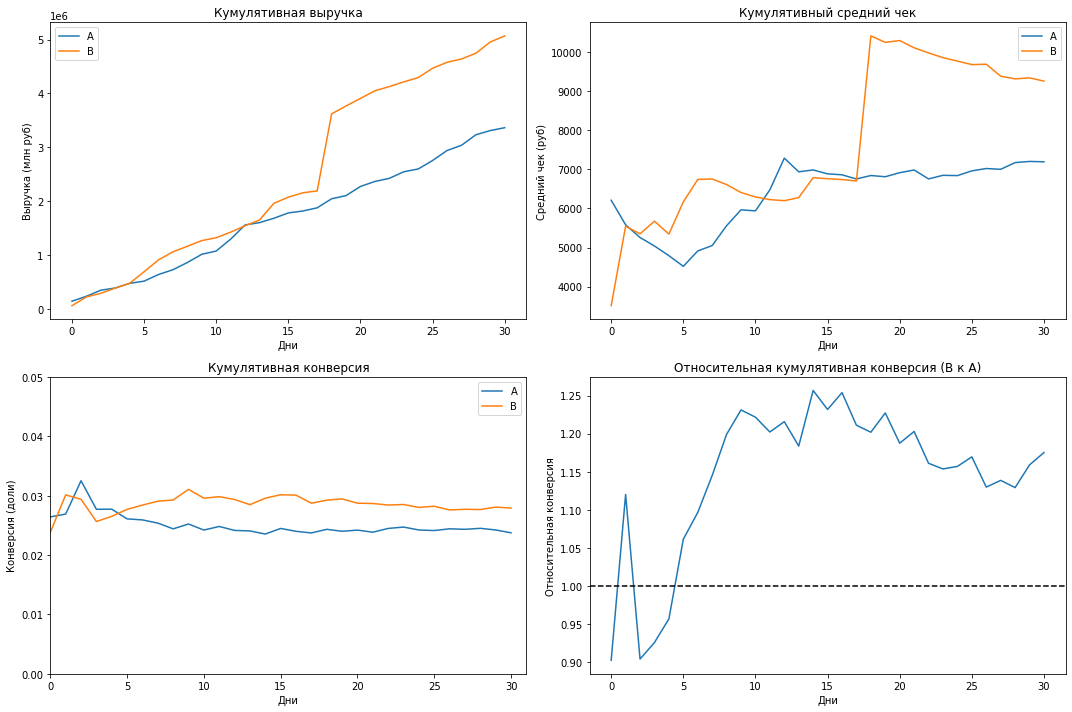

In [14]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

ax[0][0].plot(range(31), cum_data_a['revenue'], label = "A")
ax[0][0].plot(range(31), cum_data_b['revenue'], label = "B")
ax[0][0].set_xlabel('Дни')
ax[0][0].set_ylabel('Выручка (млн руб)')
ax[0][0].title.set_text('Кумулятивная выручка')
ax[0][0].legend()

ax[0][1].plot(range(31), cum_data_a['revenue'] / cum_data_a['n_orders'], label = "A")
ax[0][1].plot(range(31), cum_data_b['revenue'] / cum_data_b['n_orders'], label = "B")
ax[0][1].set_xlabel('Дни')
ax[0][1].set_ylabel('Средний чек (руб)')
ax[0][1].title.set_text('Кумулятивный средний чек')
ax[0][1].legend()

ax[1][0].plot(range(31), cum_data_a['conversion'], label = "A")
ax[1][0].plot(range(31), cum_data_b['conversion'], label = "B")
ax[1][0].set_xlabel('Дни')
ax[1][0].set_ylabel('Конверсия (доли)')
ax[1][0].axis([0, 31, 0, 0.05])
ax[1][0].title.set_text('Кумулятивная конверсия')
ax[1][0].legend()

ax[1][1].plot(merged_data['conversion_B'] / merged_data['conversion_A'])
ax[1][1].axhline(y=1, color='black', linestyle='--')
ax[1][1].set_xlabel('Дни')
ax[1][1].set_ylabel('Относительная конверсия')
ax[1][1].title.set_text('Относительная кумулятивная конверсия (B к A)')

fig.tight_layout()

Выручка:

- Мы видим, что выручка группы B сильно подскочила в районе 17 дня теста. Скорее всего, там случились какие то аномально большие покупки, которые не отражают влияния изменений, добавленных в эту группу. Позже необходимо будет очистить данные от выбросов и проверить этот график еще раз.

- Однако уже сейчас мы видим, что выручка группа B накапливалась чуть быстрее, чем для группы A, но этих данных пока недостаточно для выводов.

Средний чек:

- Мы видим, что кумулятивный средний чек группы B резко вырос как раз в момент роста выручки, что ожидаемо. Графики сильно зашумлены, и по среднему чеку сейчас мы не можем сделать никаких выводов.

Конверсия и кумулятивная конверсия:

- Конверсия в группе B ведет себя нетипично, с резким ростом, падением и последующим ростом снова. Однако она стабильно удерживалась выше группы A, что видно на графике относительной конверсии, что дает нам предположение о лучшем положении дел в этой группе.

Пока складывается впечатление, что группа B все таки несколько выигрывает у группы A, однако данные слишком сильно зашумлены.

### Обработка очищенных данных

Очистим наши данные от выбросов и повторим построения. Для начала надо определить, что считать выбросами. Для этого будем строить график рассеивания количества заказов и среднего чека, считать 95 и 99 перцентили и удалять аномальные значения.

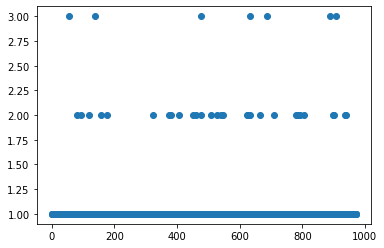

[1. 2.]


In [15]:
orders_per_user = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})

x_values = pd.Series(range(0, len(orders_per_user)))
plt.scatter(x_values, orders_per_user['transaction_id'])
plt.show()

print(np.percentile(orders_per_user['transaction_id'], [95,99]))

Для 95% пользователей количество заказов не превышает 1 заказа, а для 99% - 2х заказов. Возьмем границу по которой будем фильтровать - 1 заказ.

Посмотрим средний чек

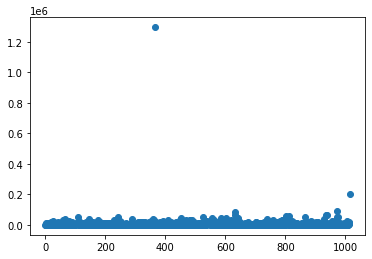

[26785. 53904.]


In [16]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.show()

print(np.percentile(orders['revenue'], [95,99]))

Для 95% пользователей стоимость заказа не превышает 26785 рублей, а для 99% - 53904 рубля. Возьмем за границу значение в 30 000р, таким образом мы отсеем от 1 до 5 процентов заказов.

In [17]:
transaction_filter = np.percentile(orders_per_user['transaction_id'], 99)
revenue_filter = np.percentile(orders['revenue'], 99)

orders_per_user.query('transaction_id < @transaction_filter')

orders_clean = orders.query('visitor_id in @orders_per_user["visitor_id"] and revenue < @revenue_filter')

Повторим построения графиков для очищенных данных

In [18]:
orders_agg_clean = (
    visitors.apply(lambda string: orders_clean[np.logical_and(orders_clean['date'] <= string['date'], orders_clean['group'] == string['group'])].agg({'date':'max', 'group':'max', 'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

visitors_agg_clean = (
    visitors.apply(lambda string: visitors[np.logical_and(visitors['date'] <= string['date'], visitors['group'] == string['group'])].agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

cum_data_clean = orders_agg_clean.merge(visitors_agg_clean, left_on=['date', 'group'], right_on=['date', 'group'])

cum_data_clean.columns = ['date', 'group', 'n_orders', 'n_buyers', 'revenue', 'n_visitors']

cum_data_clean['conversion'] = cum_data_clean['n_buyers'] / cum_data_clean['n_visitors']

cum_data_a_clean = cum_data_clean.query('group == "A"')
cum_data_b_clean = cum_data_clean.query('group == "B"')
merged_data_clean = cum_data_a_clean.merge(cum_data_b_clean, left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

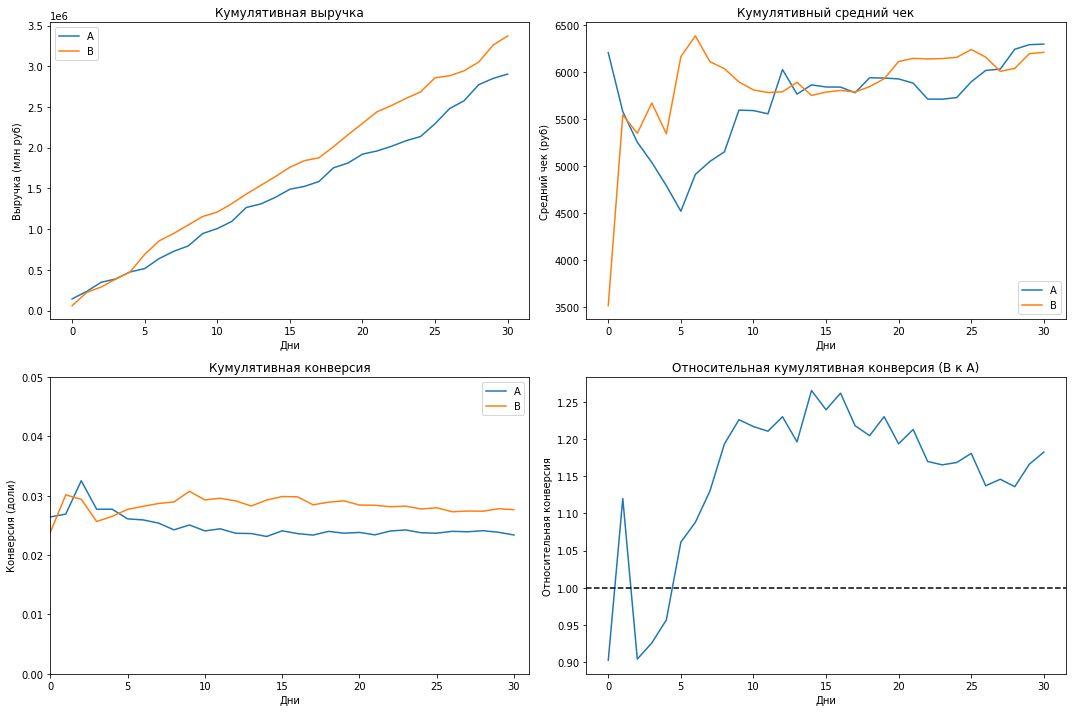

In [19]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

ax[0][0].plot(range(31), cum_data_a_clean['revenue'], label = "A")
ax[0][0].plot(range(31), cum_data_b_clean['revenue'], label = "B")
ax[0][0].set_xlabel('Дни')
ax[0][0].set_ylabel('Выручка (млн руб)')
ax[0][0].title.set_text('Кумулятивная выручка')
ax[0][0].legend()

ax[0][1].plot(range(31), cum_data_a_clean['revenue'] / cum_data_a_clean['n_orders'], label = "A")
ax[0][1].plot(range(31), cum_data_b_clean['revenue'] / cum_data_b_clean['n_orders'], label = "B")
ax[0][1].set_xlabel('Дни')
ax[0][1].set_ylabel('Средний чек (руб)')
ax[0][1].title.set_text('Кумулятивный средний чек')
ax[0][1].legend()

ax[1][0].plot(range(31), cum_data_a_clean['conversion'], label = "A")
ax[1][0].plot(range(31), cum_data_b_clean['conversion'], label = "B")
ax[1][0].set_xlabel('Дни')
ax[1][0].set_ylabel('Конверсия (доли)')
ax[1][0].axis([0, 31, 0, 0.05])
ax[1][0].title.set_text('Кумулятивная конверсия')
ax[1][0].legend()

ax[1][1].plot(merged_data_clean['conversion_B'] / merged_data_clean['conversion_A'])
ax[1][1].axhline(y=1, color='black', linestyle='--')
ax[1][1].set_xlabel('Дни')
ax[1][1].set_ylabel('Относительная конверсия')
ax[1][1].title.set_text('Относительная кумулятивная конверсия (B к A)')

fig.tight_layout()

Из графиков выручки и среднего чека пропали резкие увеличения, теперь графики выглядят правдоподобно. По кумулятивному среднему чеку мы видим, что значимых различий между группами нет, однако выручка группы B стабильно отрывается от группы A. Это происходит благодаря лучшей конверсии в группе B, что мы видим на графиках конверсии. Проверим стат значимость данных выводов. Для начала проверим наши данные на соответствие нормальному распределению. Проверять будем уже очищенные данные, так как если они не нормальные, то данные с выбросами тем более не будут.

In [20]:
print('p-value проверки на нормальность выручки A', round(st.shapiro(cum_data_a_clean['revenue']).pvalue, 2))
print('p-value проверки на нормальность выручки B', round(st.shapiro(cum_data_b_clean['revenue']).pvalue, 2))
print('p-value проверки на нормальность среднего чека A', round(st.shapiro(cum_data_a_clean['revenue'] / cum_data_a_clean['n_orders']).pvalue, 2))
print('p-value проверки на нормальность среднего чека B', round(st.shapiro(cum_data_b_clean['revenue'] / cum_data_b_clean['n_orders']).pvalue, 2))
print('p-value проверки на нормальность конверсии', round(st.shapiro(cum_data_clean['conversion']).pvalue, 2))

p-value проверки на нормальность выручки A 0.3
p-value проверки на нормальность выручки B 0.32
p-value проверки на нормальность среднего чека A 0.02
p-value проверки на нормальность среднего чека B 0.0
p-value проверки на нормальность конверсии 0.0


Как мы видим, при уровне значимости в 5% ни средний чек, ни конверсия не ведут себя нормально, поэтому для их сравнения мы будем использовать непараметрический тест Манна-Уитни. Выручки же можно сравнивать по t тесту Стьюдента.

Проверим стат значимость по сырым и очищенным данным `(α = 0.05)`

In [21]:
orders_users_a = (                                 # создаем "образцы" сырых данных для проверки
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_users_a.columns = ['visitor_id', 'orders']

orders_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_users_b.columns = ['visitor_id', 'orders'] 

sampleA = pd.concat([orders_users_a['orders'],pd.Series(0, index=np.arange(merged_data['n_visitors_A'].sum() - len(orders_users_a['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_users_b['orders'],pd.Series(0, index=np.arange(merged_data['n_visitors_B'].sum() - len(orders_users_b['orders'])), name='orders')],axis=0) 

orders_users_a_clean = (                                  # создаем "образцы" очищенных данных для проверки
    orders_clean[orders_clean['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_users_a_clean.columns = ['visitor_id', 'orders']

orders_users_b_clean = (
    orders_clean[orders_clean['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_users_b_clean.columns = ['visitor_id', 'orders'] 

sampleA_clean = pd.concat([orders_users_a_clean['orders'],pd.Series(0, index=np.arange(merged_data_clean['n_visitors_A'].sum() - len(orders_users_a_clean['orders'])), name='orders')],axis=0)

sampleB_clean = pd.concat([orders_users_b_clean['orders'],pd.Series(0, index=np.arange(merged_data_clean['n_visitors_B'].sum() - len(orders_users_b_clean['orders'])), name='orders')],axis=0) 

In [22]:
print('p-value выручки (сырые данные)', round(st.ttest_ind(merged_data['revenue_A'], merged_data['revenue_B'], equal_var=False).pvalue, 2))
print('p-value среднего чека (сырые данные)', round(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue']).pvalue, 2))
print('p-value конверсии (сырые данные)', round(st.mannwhitneyu(sampleA, sampleB).pvalue, 2))
print()
print('p-value выручки (очищенные данные)', round(st.ttest_ind(merged_data_clean['revenue_A'], merged_data_clean['revenue_B'], equal_var=False).pvalue, 2))
print('p-value среднего чека (очищенные данные)', round(st.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'], orders_clean[orders_clean['group']=='B']['revenue']).pvalue, 2))
print('p-value конверсии (очищенные данные)', round(st.mannwhitneyu(sampleA_clean, sampleB_clean).pvalue, 2))

p-value выручки (сырые данные) 0.03
p-value среднего чека (сырые данные) 0.83
p-value конверсии (сырые данные) 0.01

p-value выручки (очищенные данные) 0.24
p-value среднего чека (очищенные данные) 0.95
p-value конверсии (очищенные данные) 0.01


Конверсия показывает статистически значимую разницу как по сырым, так и по очищенным данным.  выручка перестала показывать стат значимости по очищенным данным. Это интересно, было бы здорово увидеть изменения этих метрик во времени. Визуализируем их. Визуализацию будем строить по очищенным данным.

In [23]:
dates = pd.to_datetime(pd.date_range(datetime.date(2019,8,1), datetime.date(2019,8,31))).tolist()

p_vals_rev = []
p_vals_cheque = []
p_vals_cr = []

for dt in dates:
    df = merged_data_clean[merged_data_clean['date'] <= dt]
    orders = orders_clean[orders_clean['date'] <= dt]
    orders_users_a = (
        orders[orders['group'] == 'A']
        .groupby('visitor_id', as_index=False)
        .agg({'transaction_id': pd.Series.nunique})
    )
    orders_users_a.columns = ['visitor_id', 'orders']

    orders_users_b = (
        orders[orders['group'] == 'B']
        .groupby('visitor_id', as_index=False)
        .agg({'transaction_id': pd.Series.nunique})
    )
    orders_users_b.columns = ['visitor_id', 'orders'] 

    sampleA = pd.concat([orders_users_a['orders'],pd.Series(0, index=np.arange(df['n_visitors_A'].sum() - len(orders_users_a['orders'])), name='orders')],axis=0)

    sampleB = pd.concat([orders_users_b['orders'],pd.Series(0, index=np.arange(df['n_visitors_B'].sum() - len(orders_users_b['orders'])), name='orders')],axis=0) 
    
    p_val_rev = st.ttest_ind(df['revenue_A'], df['revenue_B'], equal_var=False).pvalue
    p_vals_rev.append(p_val_rev)
    
    p_val_cheque = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue']).pvalue
    p_vals_cheque.append(p_val_cheque)
    
    p_val_cr = st.mannwhitneyu(df['conversion_A'], df['conversion_B']).pvalue
    p_vals_cr.append(p_val_cr)

Y:\Anaconda\envs\da_practicum_env\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
Y:\Anaconda\envs\da_practicum_env\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


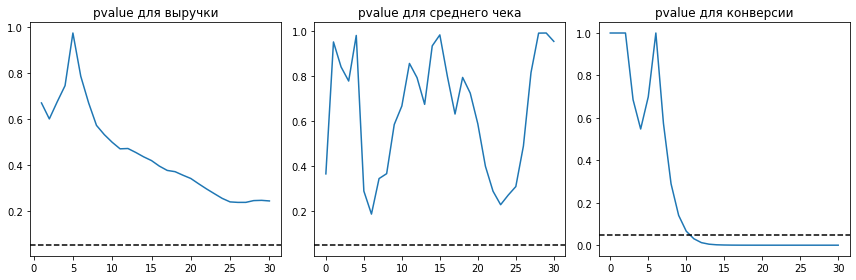

In [24]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4))

ax[0].plot(p_vals_rev, label = 'pv_revenue')
ax[0].axhline(y=0.05, color='black', linestyle='--')
ax[0].title.set_text('pvalue для выручки')

ax[1].plot(p_vals_cheque, label = 'pv_cheque')
ax[1].axhline(y=0.05, color='black', linestyle='--')
ax[1].title.set_text('pvalue для среднего чека')

ax[2].plot(p_vals_cr, label = 'pv_cr')
ax[2].axhline(y=0.05, color='black', linestyle='--')
ax[2].title.set_text('pvalue для конверсии')

fig.tight_layout()

Как мы видим, начиная с 10 дня конверсия стала показывать статистически значимое различие, и выручка, хоть пока и не показывает ее, постепенно уменьшает свое p-value. На основании этого эксперимент можно признать удачным.

Вывод: **остановить тест, зафиксировать победу группы B**